In [128]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [130]:
data=pd.read_csv('income.csv')

In [132]:
data.head()

# no -->pay 
# yes --> not pay

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [134]:
data.shape

(10000, 4)

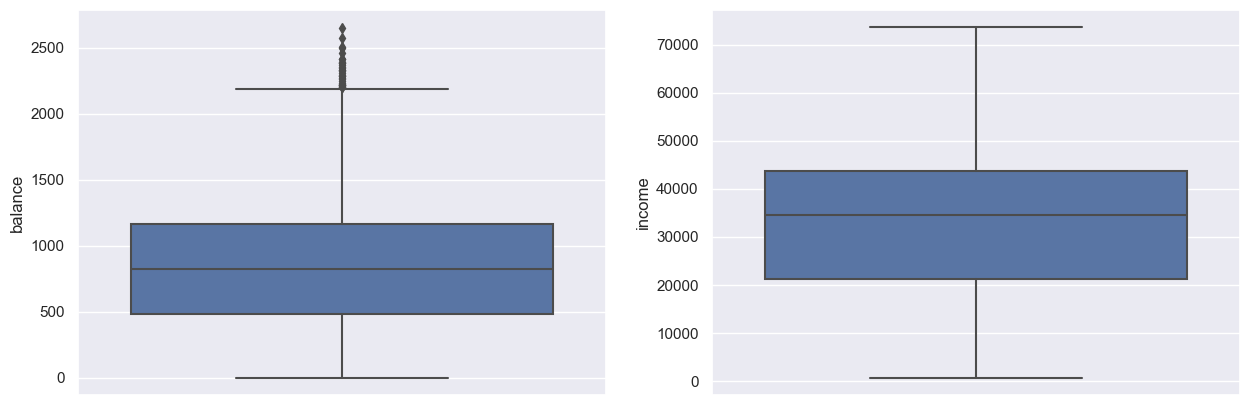

In [136]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=data['balance'])
plt.subplot(1,2,2)
sns.boxplot(y=data['income'])
plt.show()

In [138]:
data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


ValueError: could not convert string to float: 'No'

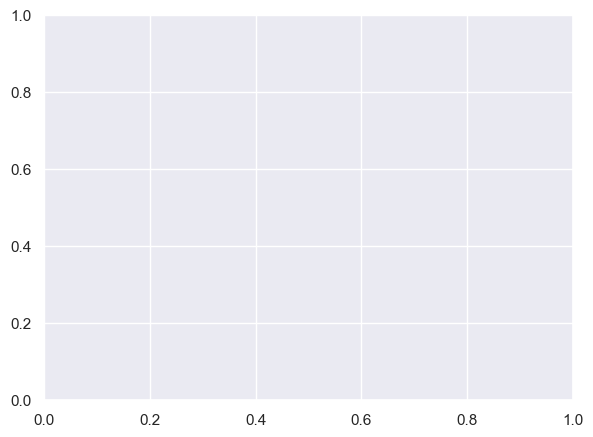

In [143]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data['student'])
plt.subplot(1,2,2)
sns.countplot(data['default'])
plt.show()

In [145]:
data['student'].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [147]:
data['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [149]:
data['student'].value_counts(normalize=True)

student
No     0.7056
Yes    0.2944
Name: proportion, dtype: float64

In [151]:
# percentange
data['default'].value_counts(normalize=True)

default
No     0.9667
Yes    0.0333
Name: proportion, dtype: float64

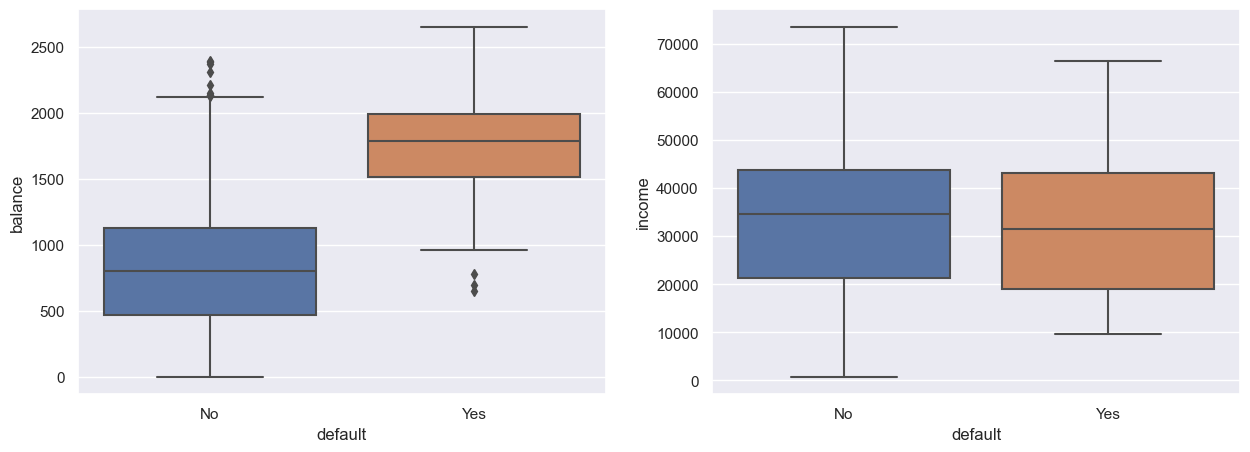

In [153]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=data['default'], y=data['balance'] , data=data)
plt.subplot(1,2,2)
sns.boxplot(x=data['default'],y=data['income'], data=data)
plt.show()

In [155]:
pd.crosstab(data['student'], data['default'],normalize='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


In [157]:
#pd.crosstab(data['balance'], data['income'],normalize='index').round(2)

<Axes: >

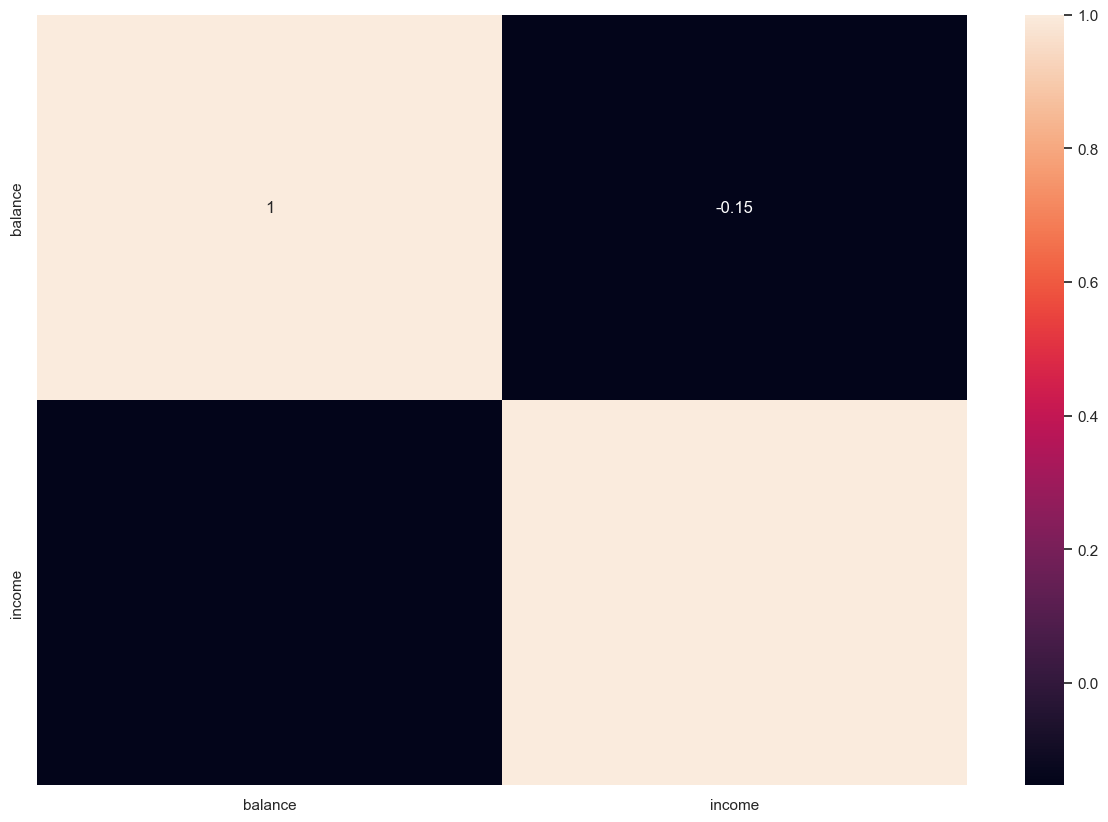

In [159]:
sns.heatmap(data[['balance','income']].corr() , annot=True)

In [161]:
data.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [163]:
q1,q3=data['balance'].quantile([.25,.75])

In [165]:
q1

481.731105054518

In [167]:
q3

1166.3083864758376

In [169]:
IQR=(q3-q1)

In [171]:
lower=q1-1.5*(IQR)
upper=q3+1.5*(IQR)

In [173]:
lower

-545.1348170774612

In [175]:
upper

2193.174308607817

In [177]:
df=data[data['balance']>lower]

In [179]:
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [181]:
df['default'].count()

10000

In [183]:
df['default'].value_counts(normalize=True)

default
No     0.9667
Yes    0.0333
Name: proportion, dtype: float64

In [185]:
df['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [187]:
data['balance']=np.where(data['balance']>upper,upper, data['balance'])      # 

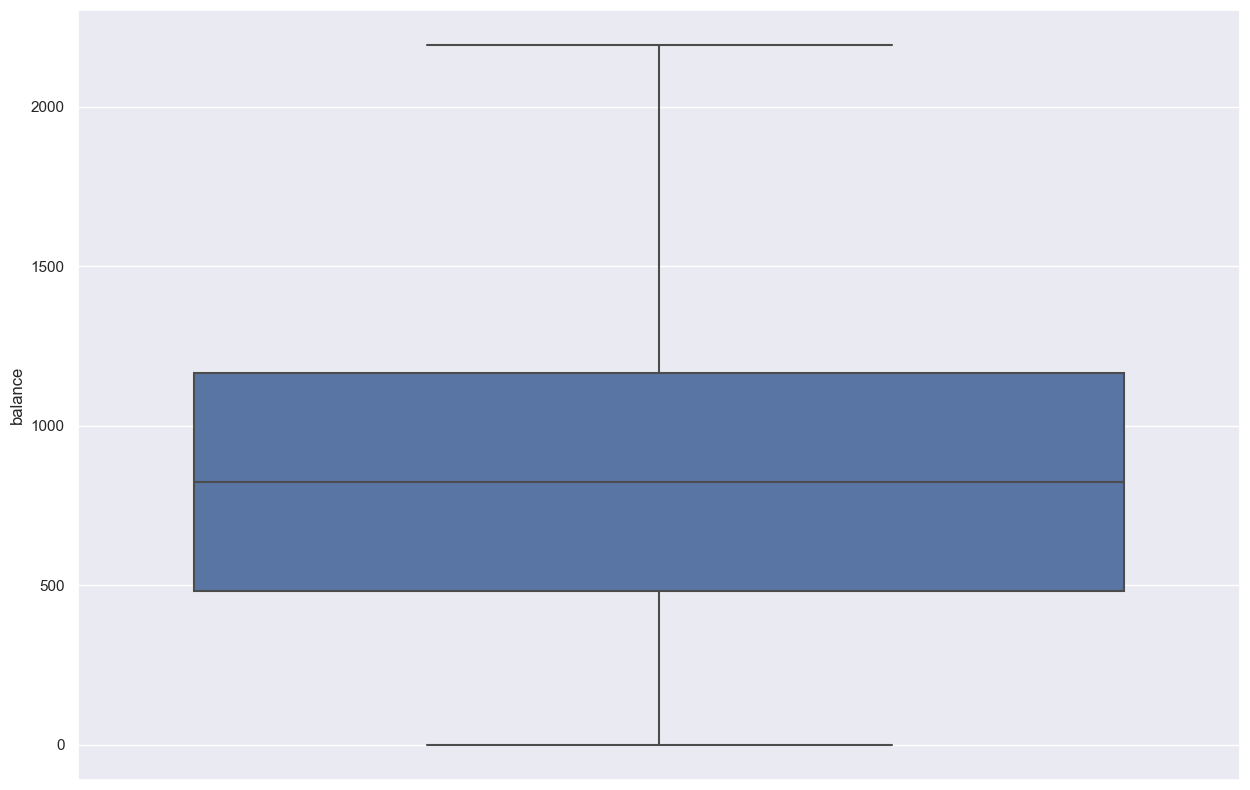

In [189]:
sns.boxplot(y=data['balance'])
plt.show()

In [191]:
# categories ==>[0,1] false , true
data=pd.get_dummies(data,drop_first=True)

In [193]:
data.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False


In [195]:
data.columns=['balance','income','default','student']

In [197]:
data.head()

,balance,income,default,student
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False


In [199]:
from sklearn.model_selection import train_test_split

In [201]:
x=data.drop('default',axis=1)  #independent

#x=data[['balance','income','student']]
y=data['default']    #dependent

In [203]:
x.head()

,balance,income,student
0,729.526495,44361.625074,False
1,817.180407,12106.134700,True
2,1073.549164,31767.138947,False
3,529.250605,35704.493935,False
4,785.655883,38463.495879,False


In [205]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: default, dtype: bool

In [207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=21,stratify=y)

In [209]:
# stratify ==> balanced data when there is imbalanced data 

In [211]:
x_train.shape


(7000, 3)

In [215]:
x_test.shape

(3000, 3)

In [217]:
print(y_train.value_counts(normalize=True).round(2))

default
False    0.97
True     0.03
Name: proportion, dtype: float64


In [219]:
y_test.value_counts(normalize=True).round(2)

default
False    0.97
True     0.03
Name: proportion, dtype: float64

In [221]:
from sklearn.linear_model import LogisticRegression

In [223]:
lr=LogisticRegression()

In [225]:
lr.fit(x_train,y_train)


LogisticRegression()

In [227]:
y_pred=lr.predict(x_test)

In [229]:
y_pred[0:5]

array([False, False, False, False, False])

In [231]:
y_test.head()

1071    False
9106    False
501     False
6475    False
5943    False
Name: default, dtype: bool

In [ ]:
#from sklearn.metrics import mean_squere_error  => linear Regression


# logistic Regression ==> confusion matrix
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred)